In [304]:
from fmr_scripts import FMR, Kittel
import numpy as np
import matplotlib.pyplot as plt
import glob,os
from scipy.interpolate import interp1d

In [23]:
fnames = ['ppblsmocro19-OOP-redo/ppblsmocro19-FMR-OOP-20191202-fitparams-1pk-lockin.npz',
          'ppblsmocro19-IP-110/ppblsmocro19-FMR-110-20190918-fitparams-1pklockin.npz',
          'ppblsmocro19-IPangle/ppblsmocro19-FMR-IP-20191202-freqscan-fitparams-1pklockin.npz',
          'ppblsmocro19-IPangle/ppblsmocro19-FMR-IP-20191202-angscan-fitparams-1pklockin.npz']

In [24]:
cnames = [f.replace('fitparams','curves') for f in fnames]

In [25]:
descr = ['OOP', '110', 'IP ang', 'IP']

In [42]:
extractedparams = [np.load(f,allow_pickle=True) for f in fnames]

In [27]:
extractedparams[0].files

['resonantFieldsErrorOe',
 'resonantFieldsOe',
 'linewidthsErrorOe',
 'anglesdeg',
 'peakMagnitudeError',
 'peakMagnitude',
 'linewidthsOe',
 'peakPhasesErrordeg',
 'frequenciesGHz',
 'peakPhasesdeg']

In [28]:
def extract(data, field, n, whichcurves):
    return np.array([data[field][i][n] for i in whichcurves])

In [29]:
numfiles = len(extractedparams)

N = [None]*numfiles
freqsN = [None]*numfiles
angsN = [None]*numfiles
HFMRN = [None]*numfiles
errHFMRN = [None]*numfiles
deltaHN = [None]*numfiles
errdeltaHN = [None]*numfiles
phaseLorentzianN = [None]*numfiles
errphaseLorentzianN = [None]*numfiles
peakMagnitudeN = [None]*numfiles
errpeakMagnitudeN = [None]*numfiles

#loop over files
for i, params in enumerate(extractedparams):
    
    #loop over peaks
    NPeaks = [len(f) for f in params['resonantFieldsOe']]
    print NPeaks

    N[i] = np.max(NPeaks)
    freqsN[i] = []
    angsN[i] = []
    HFMRN[i] = []
    errHFMRN[i] = []
    deltaHN[i] = []
    errdeltaHN[i] = []
    phaseLorentzianN[i] = []
    errphaseLorentzianN[i] = []
    peakMagnitudeN[i] = []
    errpeakMagnitudeN[i] = []
    for n in np.arange(0,N[i]):
        whichcurves = np.where(np.array(NPeaks) > n)[0]
        freqsN[i].append(params['frequenciesGHz'][whichcurves])
        angsN[i].append(params['anglesdeg'][whichcurves])
        HFMRN[i].append(extract(params,'resonantFieldsOe',n,whichcurves))
        errHFMRN[i].append(extract(params,'resonantFieldsErrorOe',n,whichcurves))
        deltaHN[i].append(extract(params,'linewidthsOe',n,whichcurves))
        errdeltaHN[i].append(extract(params,'linewidthsErrorOe',n,whichcurves))
        phaseLorentzianN[i].append(extract(params,'peakPhasesdeg',n,whichcurves))
        errphaseLorentzianN[i].append(extract(params,'peakPhasesErrordeg',n,whichcurves))
        peakMagnitudeN[i].append(extract(params,'peakMagnitude',n,whichcurves))
        errpeakMagnitudeN[i].append(extract(params,'peakMagnitudeError',n,whichcurves))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

<IPython.core.display.Javascript object>


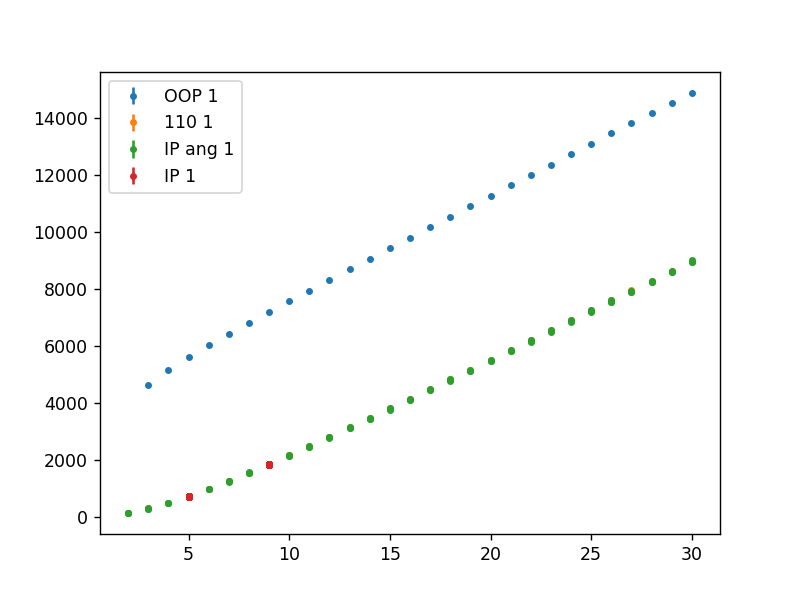

In [30]:
%matplotlib notebook
for i, n in enumerate(N):
    for j in np.arange(0,n):
        plt.errorbar(freqsN[i][j],HFMRN[i][j],fmt='.',yerr=errHFMRN[i][j],label=descr[i]+' '+str(j+1))
plt.xlabel('Frequency (GHz)')
plt.ylabel('Resonant Field (Oe)')
plt.legend()

<IPython.core.display.Javascript object>


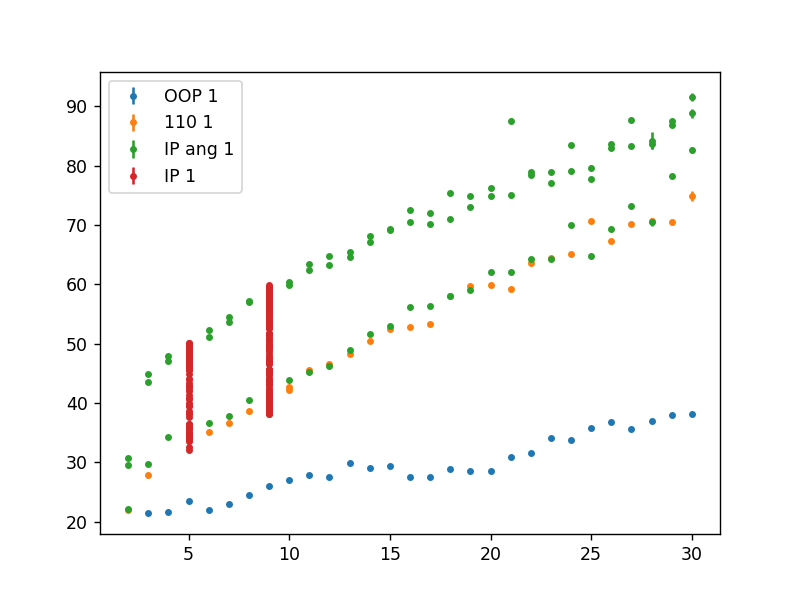

In [34]:
%matplotlib notebook
for i, n in enumerate(N):
    for j in np.arange(0,n):
        plt.errorbar(freqsN[i][j],deltaHN[i][j],fmt='.',yerr=errdeltaHN[i][j],label=descr[i]+' '+str(j+1))
plt.xlabel('Frequency (GHz)')
plt.ylabel('Linewidth (Oe)')
plt.legend()

<IPython.core.display.Javascript object>


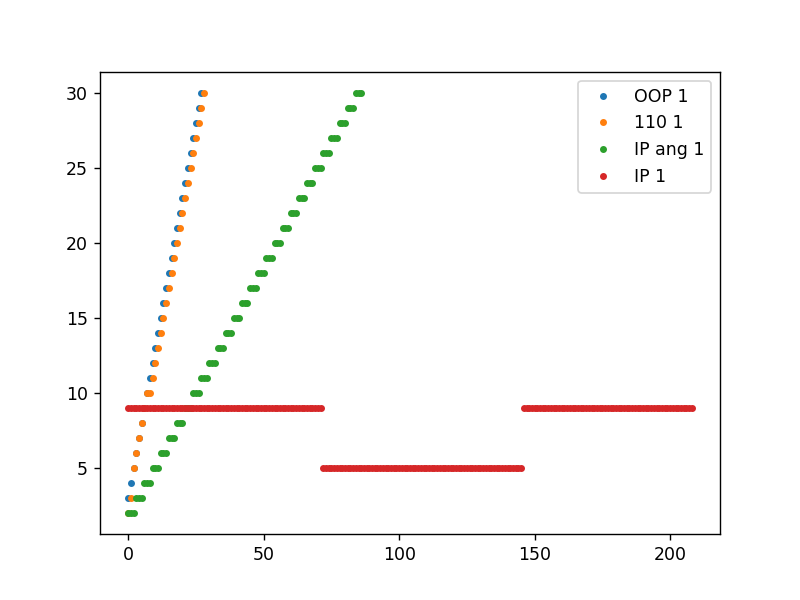

In [35]:
%matplotlib notebook
for i, n in enumerate(N):
    for j in np.arange(0,n):
        plt.plot(freqsN[i][j],'.',label=descr[i]+' '+str(j+1))
plt.legend()

<IPython.core.display.Javascript object>


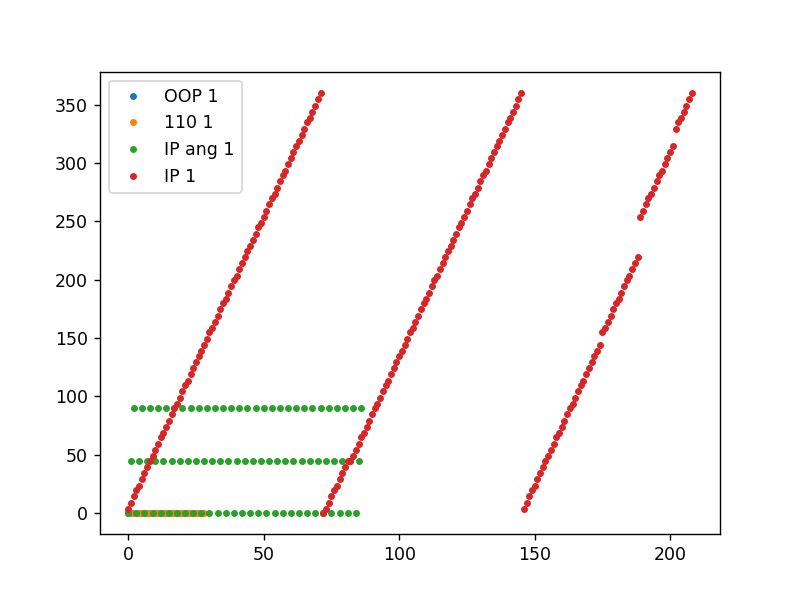

In [36]:
%matplotlib notebook
for i, n in enumerate(N):
    for j in np.arange(0,n):
        plt.plot(angsN[i][j],'.',label=descr[i]+' '+str(j+1))
plt.legend()

In [92]:
angscans = extractedparams[-1]['scans']
print angscans
for a in angscans:
    slist = extractedparams[-1][a]
    print slist
    if np.size(slist) == 1:
        print extractedparams[-1]['frequenciesGHz'][eval(str(slist))]
print list(np.array([extractedparams[-1][a] for a in angscans]).flatten())

['angscan5GHz' 'angscan9GHz']
slice(72, 146, None)
[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5.]
[slice(None, 72, None) slice(146, None, None)]
[array(slice(72, 146, None), dtype=object), array([slice(None, 72, None), slice(146, None, None)], dtype=object)]


Cutting out the '100 uV' sensitivity 9GHz scan (:72) because the sample was rotated 45 deg, as shown in a photo from my lab notebook

<IPython.core.display.Javascript object>


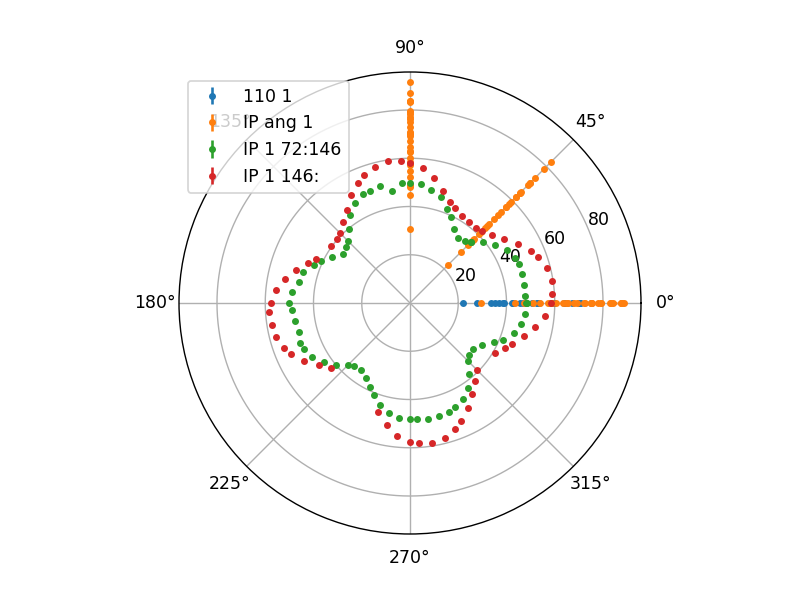

In [93]:
%matplotlib notebook
ax = plt.subplot(111, projection='polar')
for i, n in enumerate(N):
    if i != 0 and i != len(N)-1:
        for j in np.arange(0,n):
            ax.errorbar(np.deg2rad(angsN[i][j]),HFMRN[i][j],fmt='.',yerr=errHFMRN[i][j],label=descr[i]+' '+str(j+1))
    elif i == len(N)-1:
        for j in np.arange(0,n):
            ax.errorbar(np.deg2rad(angsN[i][j])[72:146],HFMRN[i][j][72:146],fmt='.',yerr=errHFMRN[i][j][72:146],label=descr[i]+' '+str(j+1)+' 72:146')
            ax.errorbar(np.deg2rad(angsN[i][j])[146:],HFMRN[i][j][146:],fmt='.',yerr=errHFMRN[i][j][146:],label=descr[i]+' '+str(j+1)+' 146:')
plt.xlabel('Angle (deg)')
plt.ylabel('Resonant Field (Oe)')
plt.legend()

<IPython.core.display.Javascript object>


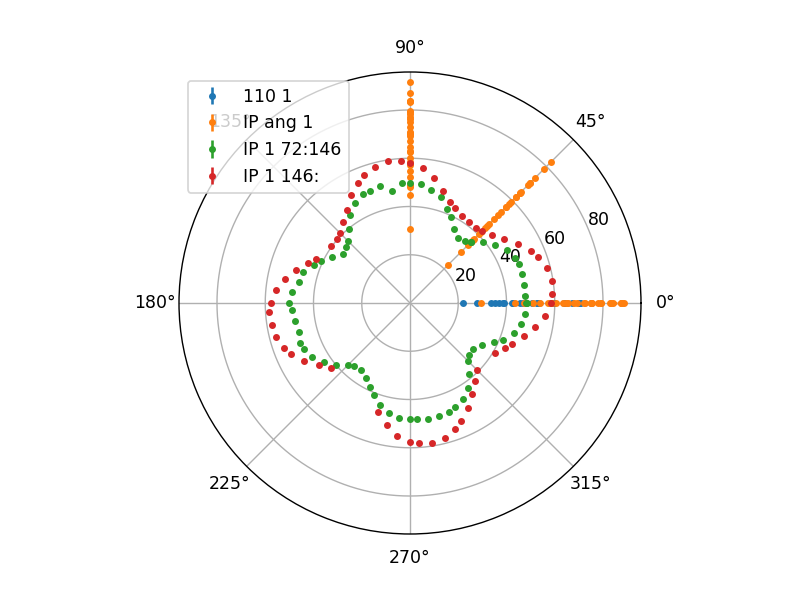

In [93]:
%matplotlib notebook
ax = plt.subplot(111, projection='polar')
for i, n in enumerate(N):
    if i != 0 and i != len(N)-1:
        for j in np.arange(0,n):
            ax.errorbar(np.deg2rad(angsN[i][j]),deltaHN[i][j],fmt='.',yerr=errdeltaHN[i][j],label=descr[i]+' '+str(j+1))
    elif i == len(N)-1:
        for j in np.arange(0,n):
            ax.errorbar(np.deg2rad(angsN[i][j])[72:146],deltaHN[i][j][72:146],fmt='.',yerr=errdeltaHN[i][j][72:146],label=descr[i]+' '+str(j+1)+' 72:146')
            ax.errorbar(np.deg2rad(angsN[i][j])[146:],deltaHN[i][j][146:],fmt='.',yerr=errdeltaHN[i][j][146:],label=descr[i]+' '+str(j+1)+' 146:')
plt.xlabel('Angle (deg)')
plt.ylabel('Linewidth (Oe)')
plt.legend()

### Combine Data

In [270]:
#First, only IP mounted on rotator
freqs = np.concatenate((freqsN[2][0],freqsN[3][0][72:])) #rotator, rotator
angs = np.concatenate((angsN[2][0],angsN[3][0][72:]))
resfield = np.concatenate((HFMRN[2][0],HFMRN[3][0][72:]))
resfielderr = np.concatenate((errHFMRN[2][0],errHFMRN[3][0][72:]))
lw = np.concatenate((deltaHN[2][0],deltaHN[3][0][72:]))
lwerr = np.concatenate((errdeltaHN[2][0],errdeltaHN[3][0][72:]))

csort = np.lexsort([freqs,angs])

angles,sequences = np.unique(angs[csort],return_counts=True)
freqs = freqs[csort]
resfield = resfield[csort]
resfielderr = resfielderr[csort]
lw = lw[csort]
lwerr = lwerr[csort]
directions = [2]*len(sequences)

#now add IP not mounted
angles = np.insert(angles,0,45.)
sequences = np.insert(sequences,0,len(angsN[1][0]))
directions = np.insert(directions,0,1)

freqs = np.insert(freqs,0,freqsN[1][0])
resfield = np.insert(resfield,0,HFMRN[1][0])
resfielderr = np.insert(resfielderr,0,errHFMRN[1][0])
lw = np.insert(lw,0,deltaHN[1][0])
lwerr = np.insert(lwerr,0,errdeltaHN[1][0])

#now add OOP
sequences = np.insert(len(angsN[0][0]),0,sequences)
directions = np.insert(0,0,directions)

freqs = np.insert(freqsN[0][0],0,freqs)
resfield = np.insert(HFMRN[0][0],0,resfield)
resfielderr = np.insert(errHFMRN[0][0],0,resfielderr)
lw = np.insert(deltaHN[0][0],0,lw)
lwerr = np.insert(errdeltaHN[0][0],0,lwerr)

print freqs
print angs
print angles
print sequences
print np.sum(sequences)
print len(freqs)
print directions

[ 2.  3.  5.  6.  7.  8.  9. 10. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.
 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.  2.  3.  4.  5.  5.  6.  7.
  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25.
 26. 27. 28. 29. 30.  5.  9.  5.  9.  5.  9.  5.  9.  5.  9.  5.  9.  5.
  9.  5.  9.  2.  3.  4.  5.  5.  5.  6.  7.  8.  9.  9. 10. 11. 12. 13.
 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.  5.
  9.  5.  9.  5.  9.  5.  9.  5.  9.  5.  9.  5.  9.  5.  9.  2.  3.  4.
  5.  5.  6.  7.  8.  9.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20.
 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.  5.  9.  5.  9.  5.  9.  5.  9.
  5.  9.  5.  9.  5.  9.  5.  9.  5.  9.  5.  9.  5.  9.  5.  5.  9.  5.
  9.  5.  9.  5.  9.  5.  9.  5.  9.  5.  9.  5.  9.  5.  9.  5.  9.  5.
  9.  5.  9.  5.  9.  5.  9.  5.  5.  5.  5.  5.  5.  5.  9.  5.  9.  5.
  9.  5.  9.  5.  9.  5.  9.  5.  9.  5.  9.  5.  9.  5.  9.  5.  9.  5.
  9.  5.  9.  5.  5.  5.  9.  5.  9.  5.  9.  5.  9

In [273]:
#First, only IP mounted on rotator
freqsA = freqsN[3][0][72:] #rotator
angsA = angsN[3][0][72:]

bsort = np.lexsort([freqsA,angsA])

anglesA,sequencesA = np.unique(angsA[bsort],return_counts=True)
freqsA = freqsA[bsort]

resfieldA = HFMRN[3][0][72:][bsort]
resfielderrA = errHFMRN[3][0][72:][bsort]
lwA = deltaHN[3][0][72:][bsort]
lwerrA = errdeltaHN[3][0][72:][bsort]
directionsA = [2]*len(sequencesA)

print freqsA
print angsA
print anglesA
print sequencesA
print np.sum(sequencesA)
print len(freqsA)
print directionsA

[5. 5. 9. 5. 9. 5. 9. 5. 9. 5. 9. 5. 9. 5. 9. 5. 9. 5. 5. 9. 5. 9. 5. 9.
 5. 9. 5. 9. 5. 9. 5. 9. 5. 9. 5. 9. 5. 9. 5. 9. 5. 9. 5. 9. 5. 9. 5. 9.
 5. 9. 5. 9. 5. 9. 5. 9. 5. 9. 5. 9. 5. 5. 9. 5. 9. 5. 9. 5. 9. 5. 9. 5.
 9. 5. 9. 5. 9. 5. 9. 5. 9. 5. 9. 5. 9. 5. 9. 5. 9. 5. 5. 5. 5. 5. 5. 5.
 9. 5. 9. 5. 9. 5. 9. 5. 9. 5. 9. 5. 9. 5. 9. 5. 9. 5. 9. 5. 9. 5. 9. 5.
 9. 5. 5. 5. 9. 5. 9. 5. 9. 5. 9. 5. 9. 5. 9. 5. 9.]
[  0.    3.6   9.   14.4  19.8  23.4  28.8  34.2  39.6  45.   45.   48.6
  54.   59.4  64.8  68.4  73.8  79.2  84.6  90.   93.6  99.  104.4 109.8
 113.4 118.8 124.2 129.6 135.  138.6 144.  149.4 154.8 158.4 163.8 169.2
 174.6 180.  183.6 189.  194.4 199.8 203.4 208.8 214.2 219.6 225.  228.6
 234.  239.4 244.8 248.4 253.8 259.2 264.6 270.  273.6 279.  284.4 289.8
 293.4 298.8 304.2 309.6 315.  318.6 324.  329.4 334.8 338.4 343.8 349.2
 354.6 360.    3.6   9.   14.4  19.8  23.4  28.8  34.2  39.6  45.   48.6
  54.   59.4  64.8  68.4  73.8  79.2  84.6  90.   93.6  99.  104.4 109.

In [175]:
sl = np.insert(np.cumsum(sequences),0,0)
print sl

[  0  29  59  61  63  65  67  69  71  73  75 107 109 111 113 115 117 119
 121 123 154 156 158 160 162 164 166 168 170 172 174 176 177 179 181 183
 185 187 189 191 193 195 197 199 201 203 205 206 207 208 209 210 211 213
 215 217 219 221 223 225 227 229 231 233 235 237 238 239 241 243 245 247
 249 251 253 281]


In [293]:
allFit = Kittel.fitAll(freqs,resfield,lw,sequences,directions,np.deg2rad(angles))

free angles:
2
[0.78539816 0.        ]
[1.17809725 0.39269908]
(array([ 1.97273935e+00,  1.11842754e+01,  3.14293909e+02,  3.75444591e+06,
       -8.94777937e-02]), array([[ 1.97993070e-06, -1.66669517e-03, -1.53846852e-04,
        -9.90338360e-04,  4.85094095e-06],
       [-1.66669517e-03,  1.76067307e+01, -5.05644157e-01,
         3.66402791e+00, -1.18553392e-01],
       [-1.53846852e-04, -5.05644157e-01,  4.24833052e-01,
        -2.75765232e-01,  1.98404619e-03],
       [-9.90338360e-04,  3.66402791e+00, -2.75765232e-01,
         4.44926701e+00, -2.10964595e-02],
       [ 4.85094095e-06, -1.18553392e-01,  1.98404619e-03,
        -2.10964595e-02,  1.47051284e-02]]))
(array([1.16428644e+01, 2.94645055e-03, 7.26426916e+01, 3.58671271e+01,
       2.10174905e+01]), array([[ 7.04919988e-01, -7.70877637e-05,  6.58813244e+00,
         3.70704083e-01,  9.26885102e-02],
       [-7.70877637e-05,  1.30914876e-08, -9.57632181e-04,
        -8.55589024e-05, -4.52750992e-05],
       [ 6.58813244e+0

In [274]:
onlyAngles = Kittel.fitAll(freqsA,resfieldA,lwA,sequencesA,directionsA,np.deg2rad(anglesA))

free angles:
1
[0.]
[0.39269908]


C:\Users\purni\Dropbox\SuzukiLab-Sync\DataAnalysisPrograms\fmr_scripts\Kittel.py:143: RuntimeWarning: invalid value encountered in arcsin
  mag = np.arcsin(np.sqrt((sqrt-fm/2.)/(sqrt+fm/2.)))


(array([ 2.07609447e+00,  1.30326553e+01,  2.62650047e+02, -1.20086192e-01]), array([[ 1.50630442e-05, -1.27183572e-04, -5.47298314e-03,
         8.64842616e-07],
       [-1.27183572e-04,  4.56827691e-01,  1.06526120e-02,
        -1.77644262e-04],
       [-5.47298314e-03,  1.06526120e-02,  2.01736006e+00,
        -2.57479159e-04],
       [ 8.64842616e-07, -1.77644262e-04, -2.57479159e-04,
         1.66776968e-04]]))
(array([-4.94135176e+02, -1.90489150e-01,  1.46171733e+02,  1.35648088e+03,
        1.33378360e+03]), array([[ 2.28232991e+13,  8.40340432e+09,  1.49669868e+07,
        -5.79626510e+13, -5.79626523e+13],
       [ 8.40340432e+09,  3.09408398e+06,  5.50870229e+03,
        -2.13415067e+10, -2.13415072e+10],
       [ 1.49671182e+07,  5.50875066e+03,  1.31817598e+03,
        -3.79987304e+07, -3.79988232e+07],
       [-5.79626510e+13, -2.13415067e+10, -3.79983968e+07,
         1.47203474e+14,  1.47203477e+14],
       [-5.79626523e+13, -2.13415072e+10, -3.79984896e+07,
         1.

In [294]:
allFit

{'G100': 35.867127057324865,
 'G110': 21.017490493392675,
 'Hcubic': 11.184275362897731,
 'Meff': 314.29390946663847,
 'Ms': 72.64269163026495,
 'alpha': 0.0029464505502276245,
 'angles': array([ 3.75444591e+06, -8.94777937e-02, -2.66459406e-02,  6.76018390e-02,
         1.61849619e-01,  2.56097398e-01,  3.18929251e-01,  4.13177031e-01,
         5.07424810e-01,  6.01672590e-01,  6.95920370e-01,  7.58752223e-01,
         8.53000002e-01,  9.47247782e-01,  1.04149556e+00,  1.10432741e+00,
         1.19857519e+00,  1.29282297e+00,  1.38707075e+00,  1.48131853e+00,
         1.54415039e+00,  1.63839817e+00,  1.73264595e+00,  1.82689372e+00,
         1.88972558e+00,  1.98397336e+00,  2.07822114e+00,  2.17246892e+00,
         2.26671670e+00,  2.32954855e+00,  2.42379633e+00,  2.51804411e+00,
         2.61229189e+00,  2.67512374e+00,  2.76937152e+00,  2.86361930e+00,
         2.95786708e+00,  3.05211486e+00,  3.11494671e+00,  3.20919449e+00,
         3.30344227e+00,  3.39769005e+00,  3.46052190

In [290]:
onlyAngles

{'G100': 1356.4808812227047,
 'G110': 1333.7835982456004,
 'Hcubic': 13.032655318740868,
 'Meff': 262.6500465811849,
 'Ms': 146.1717332413027,
 'alpha': -0.19048915004129713,
 'angles': array([ 6.16309912, -0.05725434,  0.03699344,  0.13124122,  0.225489  ,
         0.28832085,  0.38256863,  0.47681641,  0.57106419,  0.66531197,
         0.72814382,  0.8223916 ,  0.91663938,  1.01088716,  1.07371902,
         1.1679668 ,  1.26221458,  1.35646236,  1.45071014,  1.51354199,
         1.60778977,  1.70203755,  1.79628533,  1.85911718,  1.95336496,
         2.04761274,  2.14186052,  2.2361083 ,  2.29894015,  2.39318793,
         2.48743571,  2.58168349,  2.64451534,  2.73876312,  2.8330109 ,
         2.92725868,  3.02150646,  3.08433832,  3.17858609,  3.27283387,
         3.36708165,  3.42991351,  3.52416129,  3.61840907,  3.71265685,
         3.80690463,  3.86973648,  3.96398426,  4.05823204,  4.15247982,
         4.21531167,  4.30955945,  4.40380723,  4.49805501,  4.59230279,
         4.6

In [276]:
onlyAngles['angles'][0] = np.mod(onlyAngles['angles'][0],2*np.pi)

In [295]:
allFit['angles'][0] = np.mod(allFit['angles'][0],2*np.pi)

In [296]:
np.rad2deg(np.mod(allFit['angles'][0],2*np.pi)-5*np.pi/4.)

0.1133651005781373

In [297]:
offset = (allFit['angles'] - np.deg2rad(angles))[-1]

In [278]:
offsetA = (onlyAngles['angles'] - np.deg2rad(anglesA))[-1]

<IPython.core.display.Javascript object>


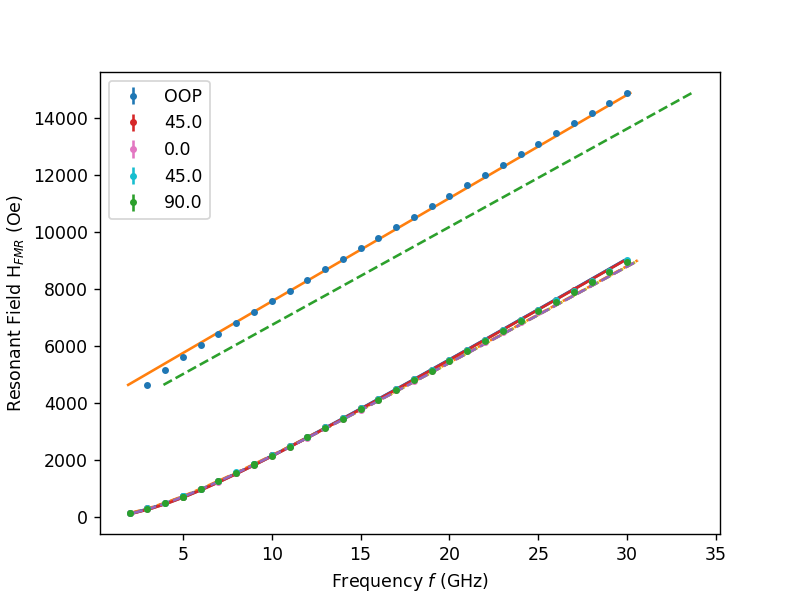

Unneccesary variables:
{'G100': 35.867127057324865, 'G110': 21.017490493392675, 'angles': array([ 3.92896941, -0.08947779, -0.02664594,  0.06760184,  0.16184962,
        0.2560974 ,  0.31892925,  0.41317703,  0.50742481,  0.60167259,
        0.69592037,  0.75875222,  0.853     ,  0.94724778,  1.04149556,
        1.10432741,  1.19857519,  1.29282297,  1.38707075,  1.48131853,
        1.54415039,  1.63839817,  1.73264595,  1.82689372,  1.88972558,
        1.98397336,  2.07822114,  2.17246892,  2.2667167 ,  2.32954855,
        2.42379633,  2.51804411,  2.61229189,  2.67512374,  2.76937152,
        2.8636193 ,  2.95786708,  3.05211486,  3.11494671,  3.20919449,
        3.30344227,  3.39769005,  3.4605219 ,  3.55476968,  3.64901746,
        3.74326524,  3.83751302,  3.90034488,  3.99459266,  4.08884044,
        4.18308822,  4.24592007,  4.34016785,  4.43441563,  4.52866341,
        4.62291119,  4.68574304,  4.77999082,  4.8742386 ,  4.96848638,
        5.03131823,  5.12556601,  5.21981379, 

In [298]:
%matplotlib notebook
plt.errorbar(freqs[-sequences[-1]:],resfield[-sequences[-1]:],fmt='.',yerr=resfielderr[-sequences[-1]:],label=descr[0])
plt.plot(Kittel.OOPresfield(resfield[-sequences[-1]:], **allFit),resfield[-sequences[-1]:],'-')
plt.plot(Kittel.OOPresfield(resfield[-sequences[-1]:], **onlyAngles),resfield[-sequences[-1]:],'--')
for i in [0,1,10,19]:
    #plt.errorbar(freqsN[1][0],HFMRN[1][0],fmt='.',yerr=errHFMRN[1][0],label=descr[1])
    plt.errorbar(freqs[sl[i]:sl[i+1]],resfield[sl[i]:sl[i+1]],fmt='.',yerr=resfielderr[sl[i]:sl[i+1]],label=angles[i])
    #plt.plot(Kittel.IPresfield(HFMRN[1][0], angle=unpatterned['angles'][0], **unpatterned),HFMRN[1][0],'-')
    plt.plot(Kittel.IPresfield(resfield[sl[i]:sl[i+1]], angle=allFit['angles'][i], **allFit),resfield[sl[i]:sl[i+1]],'-')
    plt.plot(Kittel.IPresfield(resfield[sl[i]:sl[i+1]], angle=onlyAngles['angles'][i], **onlyAngles),resfield[sl[i]:sl[i+1]],'--')
#plt.errorbar(freqsN[0][0],HFMRN[0][0],fmt='.',yerr=errHFMRN[0][0],label=descr[0])
#plt.plot(Kittel.OOPresfield(HFMRN[0][0], **unpatterned),HFMRN[0][0],'-')

plt.xlabel(r'Frequency $f$ (GHz)')
plt.ylabel(r'Resonant Field H$_{FMR}$ (Oe)')

plt.legend()

<IPython.core.display.Javascript object>


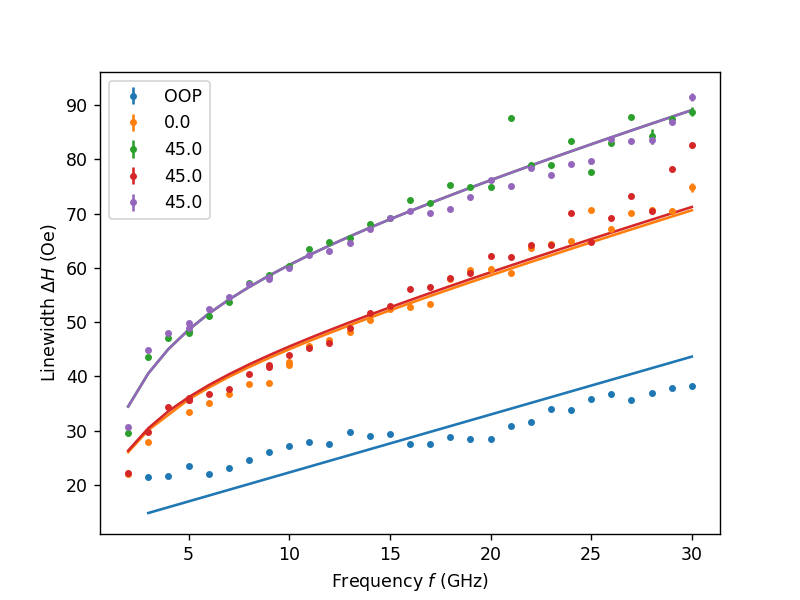

Unneccesary variables:
{'G100': 35.867127057324865, 'Meff': 314.29390946663847, 'G110': 21.017490493392675, 'angles': array([ 3.92896941, -0.08947779, -0.02664594,  0.06760184,  0.16184962,
        0.2560974 ,  0.31892925,  0.41317703,  0.50742481,  0.60167259,
        0.69592037,  0.75875222,  0.853     ,  0.94724778,  1.04149556,
        1.10432741,  1.19857519,  1.29282297,  1.38707075,  1.48131853,
        1.54415039,  1.63839817,  1.73264595,  1.82689372,  1.88972558,
        1.98397336,  2.07822114,  2.17246892,  2.2667167 ,  2.32954855,
        2.42379633,  2.51804411,  2.61229189,  2.67512374,  2.76937152,
        2.8636193 ,  2.95786708,  3.05211486,  3.11494671,  3.20919449,
        3.30344227,  3.39769005,  3.4605219 ,  3.55476968,  3.64901746,
        3.74326524,  3.83751302,  3.90034488,  3.99459266,  4.08884044,
        4.18308822,  4.24592007,  4.34016785,  4.43441563,  4.52866341,
        4.62291119,  4.68574304,  4.77999082,  4.8742386 ,  4.96848638,
        5.03131823

In [299]:
%matplotlib notebook
plt.errorbar(freqs[-sequences[-1]:],lw[-sequences[-1]:],fmt='.C0',yerr=lwerr[-sequences[-1]:],label=descr[0])
plt.plot(freqs[-sequences[-1]:],Kittel.OOPlinewidth(freqs[-sequences[-1]:], **allFit),'-C0')
#plt.plot(freqs[-sequences[-1]:],Kittel.OOPlinewidth(freqs[-sequences[-1]:], **onlyAngles),'--C0')
freqdep = [0,1,10,19]
for c,i in enumerate(freqdep,1):
    plt.errorbar(freqs[sl[i]:sl[i+1]],lw[sl[i]:sl[i+1]],fmt='.C'+str(c),yerr=lwerr[sl[i]:sl[i+1]],label=angs[i])
    plt.plot(freqs[sl[i]:sl[i+1]],Kittel.IPlinewidth(freqs[sl[i]:sl[i+1]], angle=allFit['angles'][i], **allFit),'-C'+str(c))
#    plt.plot(freqs[sl[i]:sl[i+1]],Kittel.IPlinewidth(freqs[sl[i]:sl[i+1]], angle=onlyAngles['angles'][i], **onlyAngles),'--C'+str(c))

plt.xlabel(r'Frequency $f$ (GHz)')
plt.ylabel(r'Linewidth $\Delta H$ (Oe)')
plt.legend()

In [236]:
#only IP mounted on rotator
freqsAD = np.concatenate((freqsN[2][0],freqsN[3][0][72:]))
angsAD = np.concatenate((angsN[2][0],angsN[3][0][72:]))
resfieldAD = np.concatenate((HFMRN[2][0],HFMRN[3][0][72:]))
resfielderrAD = np.concatenate((errHFMRN[2][0],errHFMRN[3][0][72:]))
lwAD = np.concatenate((deltaHN[2][0],deltaHN[3][0][72:]))
lwerrAD = np.concatenate((errdeltaHN[2][0],errdeltaHN[3][0][72:]))

asort = np.lexsort([angsAD,freqsAD])

frequencies,sequencesf = np.unique(freqsAD[asort],return_counts=True)
angsAD = angsAD[asort]
resfieldAD = resfieldAD[asort]
resfielderrAD = resfielderrAD[asort]
lwAD = lwAD[asort]
lwerrAD = lwerrAD[asort]

print freqsAD
print angsAD
print frequencies
print sequencesf
print np.sum(sequencesf)
print len(freqsAD)

[ 2.  2.  2.  3.  3.  3.  4.  4.  4.  5.  5.  5.  6.  6.  6.  7.  7.  7.
  8.  8.  8.  9.  9.  9. 10. 10. 10. 11. 11. 11. 12. 12. 12. 13. 13. 13.
 14. 14. 14. 15. 15. 15. 16. 16. 16. 17. 17. 17. 18. 18. 18. 19. 19. 19.
 20. 20. 20. 21. 21. 21. 22. 22. 22. 23. 23. 23. 24. 24. 24. 25. 25. 25.
 26. 26. 26. 27. 27. 27. 28. 28. 28. 29. 29. 29. 30. 30. 30.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.]
[  0.   45.   90.    0.   45.   90.    0.   45.   90.    0.    0.    3.6
   9.   14.4  19.

<IPython.core.display.Javascript object>


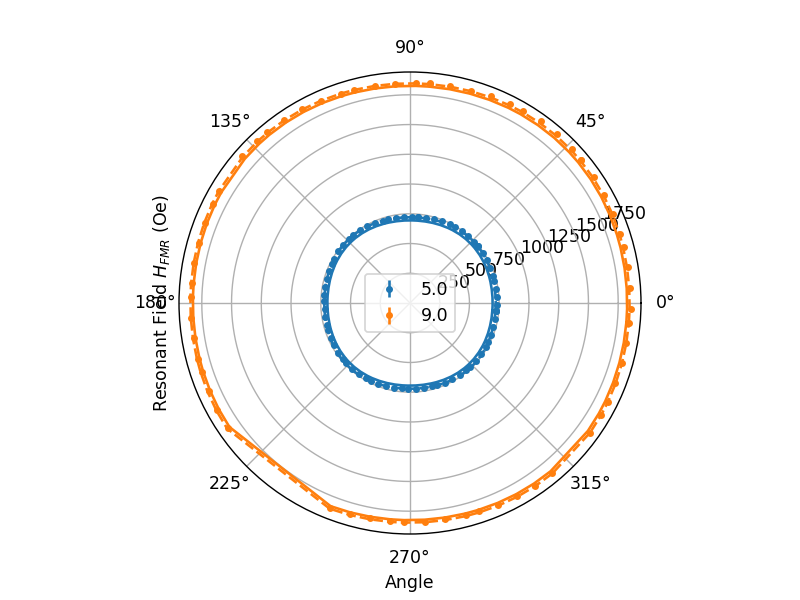

Unneccesary variables:
{'G100': 35.867127057324865, 'G110': 21.017490493392675, 'Ms': 72.64269163026495, 'deltaH0': 11.642864421890648, 'angles': array([ 3.92896941, -0.08947779, -0.02664594,  0.06760184,  0.16184962,
        0.2560974 ,  0.31892925,  0.41317703,  0.50742481,  0.60167259,
        0.69592037,  0.75875222,  0.853     ,  0.94724778,  1.04149556,
        1.10432741,  1.19857519,  1.29282297,  1.38707075,  1.48131853,
        1.54415039,  1.63839817,  1.73264595,  1.82689372,  1.88972558,
        1.98397336,  2.07822114,  2.17246892,  2.2667167 ,  2.32954855,
        2.42379633,  2.51804411,  2.61229189,  2.67512374,  2.76937152,
        2.8636193 ,  2.95786708,  3.05211486,  3.11494671,  3.20919449,
        3.30344227,  3.39769005,  3.4605219 ,  3.55476968,  3.64901746,
        3.74326524,  3.83751302,  3.90034488,  3.99459266,  4.08884044,
        4.18308822,  4.24592007,  4.34016785,  4.43441563,  4.52866341,
        4.62291119,  4.68574304,  4.77999082,  4.8742386 ,  4.

Unneccesary variables:
{'G100': 1356.4808812227047, 'G110': 1333.7835982456004, 'Ms': 146.1717332413027, 'deltaH0': -494.1351758050384, 'angles': array([ 6.16309912, -0.05725434,  0.03699344,  0.13124122,  0.225489  ,
        0.28832085,  0.38256863,  0.47681641,  0.57106419,  0.66531197,
        0.72814382,  0.8223916 ,  0.91663938,  1.01088716,  1.07371902,
        1.1679668 ,  1.26221458,  1.35646236,  1.45071014,  1.51354199,
        1.60778977,  1.70203755,  1.79628533,  1.85911718,  1.95336496,
        2.04761274,  2.14186052,  2.2361083 ,  2.29894015,  2.39318793,
        2.48743571,  2.58168349,  2.64451534,  2.73876312,  2.8330109 ,
        2.92725868,  3.02150646,  3.08433832,  3.17858609,  3.27283387,
        3.36708165,  3.42991351,  3.52416129,  3.61840907,  3.71265685,
        3.80690463,  3.86973648,  3.96398426,  4.05823204,  4.15247982,
        4.21531167,  4.30955945,  4.40380723,  4.49805501,  4.59230279,
        4.65513464,  4.74938242,  4.8436302 ,  4.93787798,  5.

{'G100': 1356.4808812227047, 'G110': 1333.7835982456004, 'Ms': 146.1717332413027, 'deltaH0': -494.1351758050384, 'angles': array([ 6.16309912, -0.05725434,  0.03699344,  0.13124122,  0.225489  ,
        0.28832085,  0.38256863,  0.47681641,  0.57106419,  0.66531197,
        0.72814382,  0.8223916 ,  0.91663938,  1.01088716,  1.07371902,
        1.1679668 ,  1.26221458,  1.35646236,  1.45071014,  1.51354199,
        1.60778977,  1.70203755,  1.79628533,  1.85911718,  1.95336496,
        2.04761274,  2.14186052,  2.2361083 ,  2.29894015,  2.39318793,
        2.48743571,  2.58168349,  2.64451534,  2.73876312,  2.8330109 ,
        2.92725868,  3.02150646,  3.08433832,  3.17858609,  3.27283387,
        3.36708165,  3.42991351,  3.52416129,  3.61840907,  3.71265685,
        3.80690463,  3.86973648,  3.96398426,  4.05823204,  4.15247982,
        4.21531167,  4.30955945,  4.40380723,  4.49805501,  4.59230279,
        4.65513464,  4.74938242,  4.8436302 ,  4.93787798,  5.00070983,
        5.094

In [308]:
%matplotlib notebook
angdep = [3,7]
ax = plt.subplot(111, projection='polar')

for c,i in enumerate(angdep):
    plt.errorbar(np.deg2rad(angsAD[sla[i]:sla[i+1]])+offset,resfieldAD[sla[i]:sla[i+1]],fmt='.C'+str(c),yerr=resfielderrAD[sla[i]:sla[i+1]],label=frequencies[i])
    
    HFMRIPang = []
    for j,a in enumerate(np.deg2rad(angsAD[sla[i]:sla[i+1]])+offset):
        func = interp1d(Kittel.IPresfield(resfield, angle=a,**allFit),resfield)
        HFMRIPang.append(func(frequencies[i]))
    plt.plot(np.deg2rad(angsAD[sla[i]:sla[i+1]])+offset,HFMRIPang,'-C'+str(c))
    
    HFMRIPang = []
    for j,a in enumerate(np.deg2rad(angsAD[sla[i]:sla[i+1]])+offset):
        func = interp1d(Kittel.IPresfield(resfield, angle=a,**onlyAngles),resfield)
        HFMRIPang.append(func(frequencies[i]))
    plt.plot(np.deg2rad(angsAD[sla[i]:sla[i+1]])+offset,HFMRIPang,'--C'+str(c))


plt.xlabel('Angle')
plt.ylabel(r'Resonant Field $H_{FMR}$ (Oe)')
plt.legend()

#ax2.set_yticks(np.linspace(0,1,7)) # set new tick positions
#ax2.set_yticklabels(['60 %','40 %', '20 %', '0 %', '20 %', '40 %', '60 %'])
#ax2.yaxis.set_minor_locator(AutoMinorLocator(2)) # set minor tick for every second tick
    


<IPython.core.display.Javascript object>


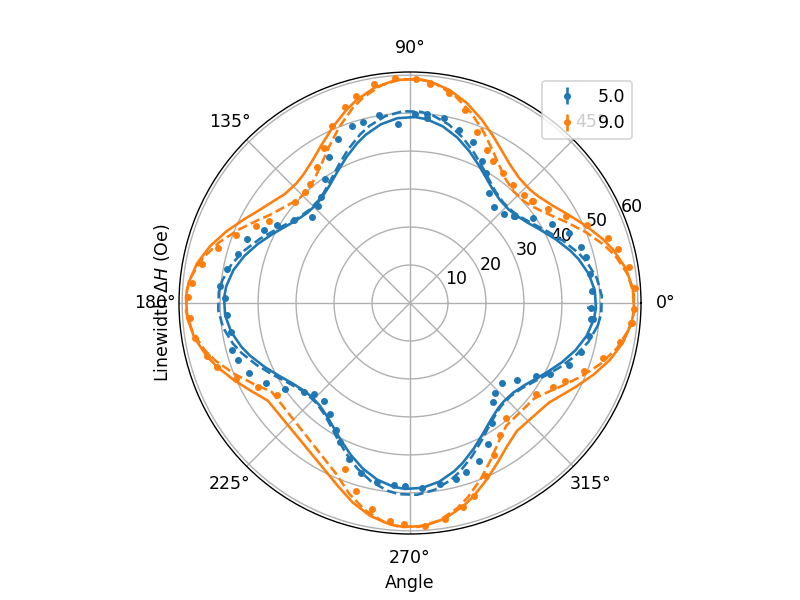

Unneccesary variables:
{'Meff': 314.29390946663847, 'Hcubic': 11.184275362897731, 'angles': array([ 3.92896941, -0.08947779, -0.02664594,  0.06760184,  0.16184962,
        0.2560974 ,  0.31892925,  0.41317703,  0.50742481,  0.60167259,
        0.69592037,  0.75875222,  0.853     ,  0.94724778,  1.04149556,
        1.10432741,  1.19857519,  1.29282297,  1.38707075,  1.48131853,
        1.54415039,  1.63839817,  1.73264595,  1.82689372,  1.88972558,
        1.98397336,  2.07822114,  2.17246892,  2.2667167 ,  2.32954855,
        2.42379633,  2.51804411,  2.61229189,  2.67512374,  2.76937152,
        2.8636193 ,  2.95786708,  3.05211486,  3.11494671,  3.20919449,
        3.30344227,  3.39769005,  3.4605219 ,  3.55476968,  3.64901746,
        3.74326524,  3.83751302,  3.90034488,  3.99459266,  4.08884044,
        4.18308822,  4.24592007,  4.34016785,  4.43441563,  4.52866341,
        4.62291119,  4.68574304,  4.77999082,  4.8742386 ,  4.96848638,
        5.03131823,  5.12556601,  5.21981379

In [300]:
%matplotlib notebook
angdep = [3,7]
ax = plt.subplot(111, projection='polar')

for c,i in enumerate(angdep):
    plt.errorbar(np.deg2rad(angsAD[sla[i]:sla[i+1]])+offset,lwAD[sla[i]:sla[i+1]],fmt='.C'+str(c),yerr=lwerrAD[sla[i]:sla[i+1]],label=frequencies[i])
    plt.plot(np.deg2rad(angsAD[sla[i]:sla[i+1]])+offset,Kittel.IPlinewidth(frequencies[i], angle=np.deg2rad(angsAD[sla[i]:sla[i+1]])+offset, **allFit),'-C'+str(c))
    plt.plot(np.deg2rad(angsAD[sla[i]:sla[i+1]])+offsetA,Kittel.IPlinewidth(frequencies[i], angle=np.deg2rad(angsAD[sla[i]:sla[i+1]])+offsetA, **onlyAngles),'--C'+str(c))
plt.xlabel('Angle')
plt.ylabel(r'Linewidth $\Delta H$ (Oe)')
plt.legend()

#ax2.set_yticks(np.linspace(0,1,7)) # set new tick positions
#ax2.set_yticklabels(['60 %','40 %', '20 %', '0 %', '20 %', '40 %', '60 %'])
#ax2.yaxis.set_minor_locator(AutoMinorLocator(2)) # set minor tick for every second tick
    


In [62]:
reload(Kittel)

<module 'fmr_scripts.Kittel' from 'C:\Users\purni\Dropbox\SuzukiLab-Sync\DataAnalysisPrograms\fmr_scripts\Kittel.py'>

In [301]:
np.savez('fromAll',**allFit)

In [302]:
np.savez('fromIPAngDep',**onlyAngles)